<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [369]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("Turkey_data.csv")

In [370]:
df.shape

(536, 8)

In [371]:
df.head()

,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,ISE
0,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524,0.038376
1,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773,0.031813
2,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015,-0.026353
3,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424,-0.084716
4,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802,0.009658


In [372]:
# df.sample(n = 10)

In [373]:
column_names = df.columns
print(column_names)

Index(['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM', 'ISE'], dtype='object')


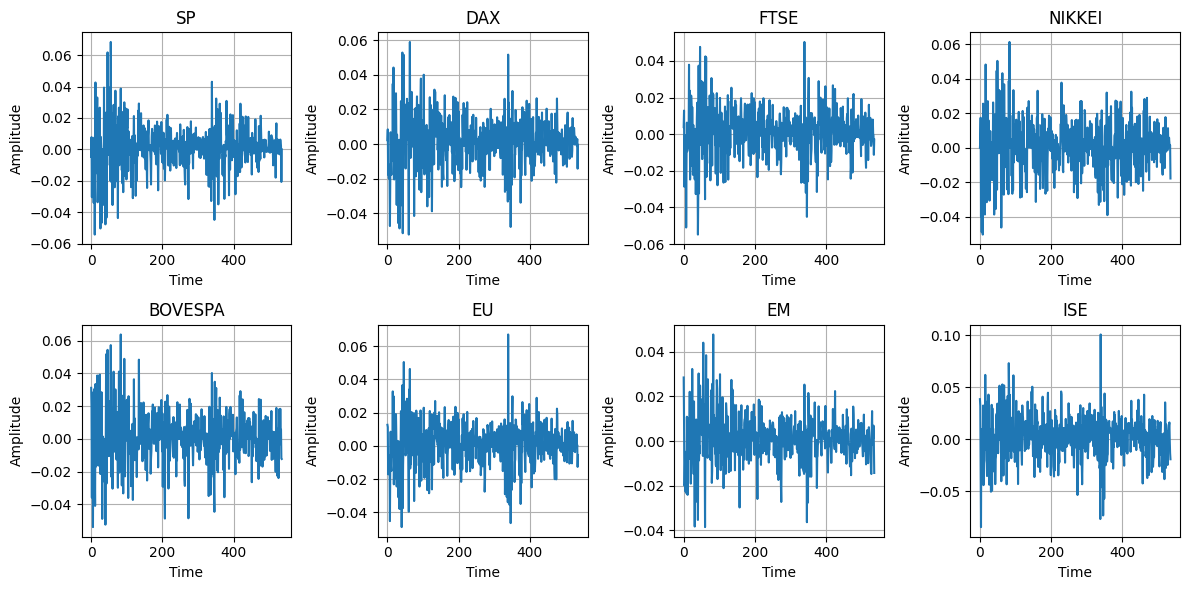

<Figure size 640x480 with 0 Axes>

In [374]:
import pandas as pd
import matplotlib.pyplot as plt

# create subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

# iterate over column names
for i, col in enumerate(df.columns):
    # select column using [] operator
    col_data = df[col]
    
    # plot column data on subplot
    axs[i//4, i%4].plot(col_data)
    axs[i//4, i%4].set_title(col)
    axs[i//4, i%4].set_xlabel('Time')
    axs[i//4, i%4].set_ylabel('Amplitude')
    axs[i//4, i%4].grid(True)

# adjust subplot spacing
plt.tight_layout()

# display plot
plt.show()

# save the input and output data
plt.savefig('In_Out_Data.png')


**Correlation between different variables**

In [375]:
# Correlation heatmap with mask for upper traingle
# Correlation between different variables
corr = df.corr()

# get absolute correlation coefficients and sort in descending order
abs_corr = corr.abs().sort_values(by='ISE', ascending=False)

# display the rank of features based on correlation coefficients
rank = abs_corr['ISE'].rank(ascending=False).astype(int)
print('Rank of features based on correlation coefficients:\n', rank)

Rank of features based on correlation coefficients:
 ISE        1
EM         2
EU         3
FTSE       4
DAX        5
SP         6
BOVESPA    7
NIKKEI     8
Name: ISE, dtype: int64


**Drawing the heatmap**

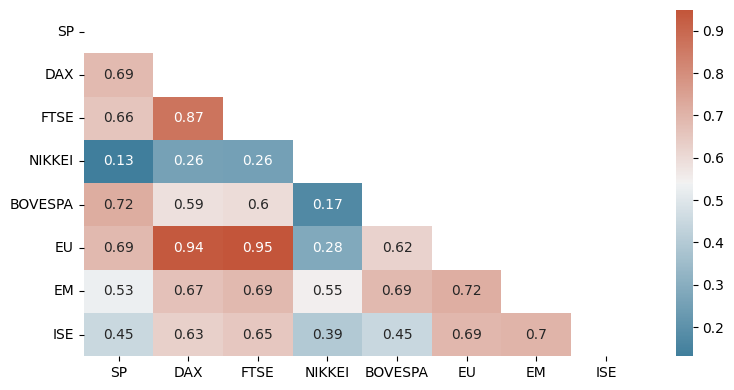

In [376]:
import seaborn as sns

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(8, 4))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.tight_layout()
plt.savefig('Heatmap.png')

In [377]:
import matplotlib.pyplot as plt

def plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred, y_test, y_test_pred, filename):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # subplot 1: actual and estimated responses for training cases
    axs[0].plot(y_train, label='Actual')
    axs[0].plot(y_train_pred, label='Predicted')
    axs[0].set_title('Training Case')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Amplitude')
    axs[0].legend()
    axs[0].grid()

    # subplot 2: actual and estimated responses for testing cases
    axs[1].plot(y_test, label='Actual y_test')
    axs[1].plot(y_test_pred, label='Estimated y_test_pred')
    axs[1].set_title('Testing Case')
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Amplitude')
    axs[1].legend()
    axs[1].grid()

    # adjust subplot spacing
    plt.tight_layout()

    # Save the figure
    fig.savefig(filename)

    # display plot
    plt.show()

In [378]:
import matplotlib.pyplot as plt
import numpy as np

def plot_two_responses(y_train, y_train_pred, filename, label):
    
    # Assuming y_train and y_train_pred are numpy arrays
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # Plot actual vs predicted response
    ax1.plot(y_train)
    ax1.plot(y_train_pred)
    # ax1.set_xlabel('Training Examples')
    ax1.set_ylabel('Response')
    ax1.set_title(label)
    ax1.legend()
    ax1.grid()

    # Plot error over time
    errors = y_train - y_train_pred.flatten()
    ax2.plot(errors, label='Error')
    # ax2.set_xlabel('Training Examples')
    ax2.set_ylabel('Error')
    # ax2.set_title('Error vs. Training Examples (Training Set)')
    ax2.legend()
    ax2.grid()

    # adjust subplot spacing
    plt.tight_layout()

    plt.show()
    # Save the figure
    fig.savefig(filename)


In [379]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

def plot_actual_vs_predicted(name, y_train, y_train_pred, y_test, y_test_pred):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

    ax1.scatter(y_train, y_train_pred, label='Training')
    ax1.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', lw=3)
    ax1.set_xlabel('Actual')
    ax1.set_ylabel('Predicted')
    ax1.set_title('Training Set')
    ax1.grid(True)

    ax2.scatter(y_test, y_test_pred, label='Testing')
    ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=3)
    ax2.set_xlabel('Actual')
    ax2.set_ylabel('Predicted')
    ax2.set_title('Testing Set')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Save the figure with the specified filename
    fig.savefig(f'{name}.png')


In [380]:
import numpy as np
import pandas as pd
from math import sqrt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(model, X_train, y_train, X_test, y_test):

    # Calculate predictions for both training and testing datasets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the MSE, R-squared, MAE, VAF, and RMSE for both training and testing datasets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
       
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2  = r2_score(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae  = mean_absolute_error(y_test, y_test_pred)

    train_rmse = sqrt(train_mse)
    test_rmse = sqrt(test_mse)

    # Create a table to display the results
    results = pd.DataFrame({
        'Metric': ['MSE', 'MAE', 'RMSE', 'R-squared'],
        'Training Set': [train_mse, train_mae, train_rmse, train_r2],
        'Testing Set': [test_mse, test_mae, test_rmse, test_r2]
    })
    print(results)
    
    return results

**Split data into training and testing sets**

In [381]:
# Split data into training and testing sets
X = df.drop('ISE', axis=1).values
y = df['ISE'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression**

In [382]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
LinearR = LinearRegression()
LinearR.fit(X_train, y_train)

# Evaluate the model on the testing set
score = LinearR.score(X_test, y_test)
print('R-squared score:', score)

R-squared score: 0.5827104537281138


In [383]:
evaluate_model(LinearR, X_train, y_train, X_test, y_test)

      Metric  Training Set  Testing Set
0        MSE      0.000171     0.000243
1        MAE      0.010084     0.011722
2       RMSE      0.013096     0.015586
3  R-squared      0.578219     0.582710


,Metric,Training Set,Testing Set
0,MSE,0.000171,0.000243
1,MAE,0.010084,0.011722
2,RMSE,0.013096,0.015586
3,R-squared,0.578219,0.582710


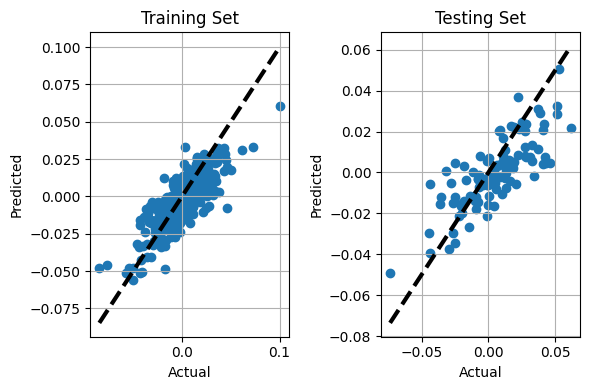

In [384]:
plot_actual_vs_predicted('Correlation_LR', y_train, y_train_pred, y_test, y_test_pred)

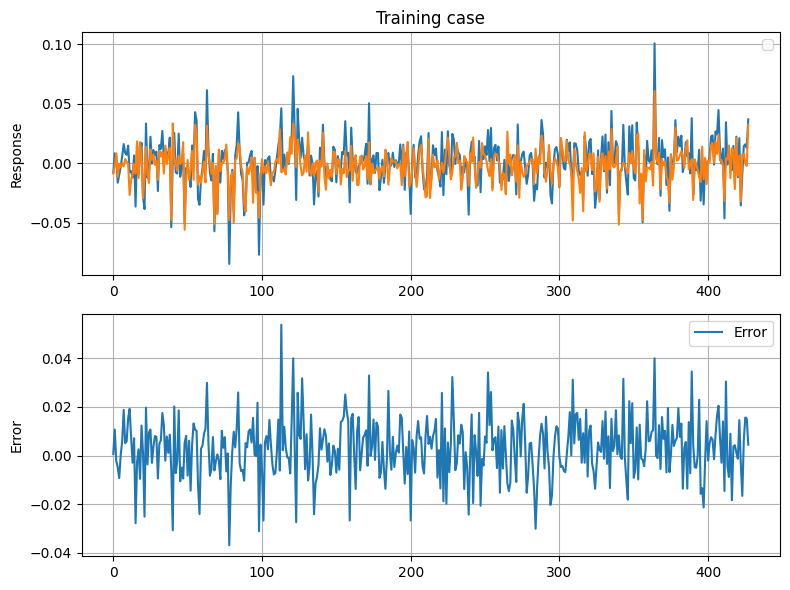

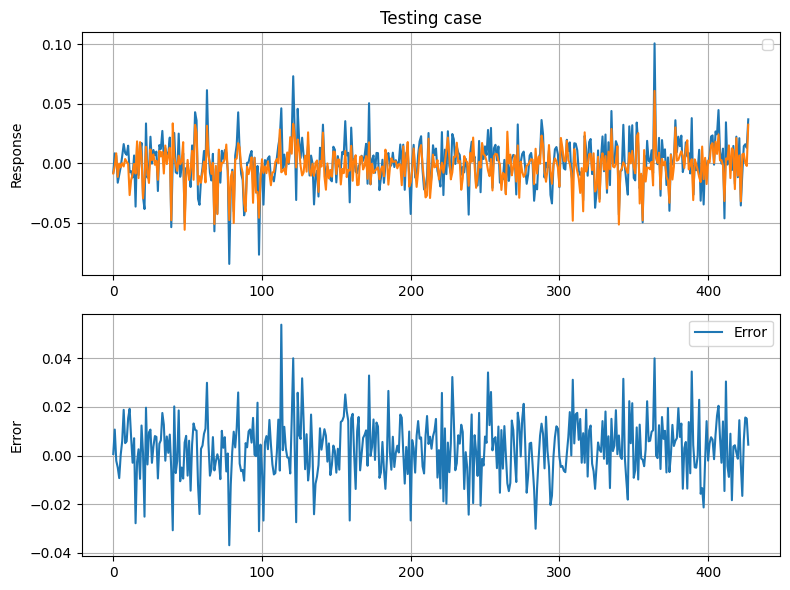

In [385]:
plot_two_responses(y_train, y_train_pred, 'LR_training', 'Training case')
plot_two_responses(y_train, y_train_pred, 'LR_testing', 'Testing case')

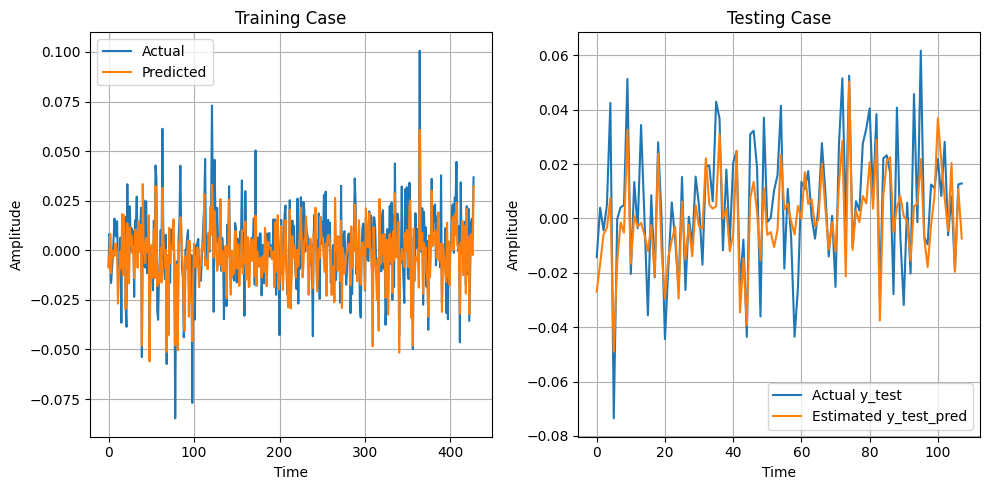

In [386]:
plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred, y_test, y_test_pred, 'Actual_Estimated_SS_LR.png')

**Deep Learning**

In [387]:
# Define the model architecture
DL_model = Sequential()
DL_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
DL_model.add(Dense(16, activation='relu'))
DL_model.add(Dense(1, activation='linear'))

# Compile the model
# DL_model.compile(loss='mse', optimizer='adam')
DL_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model with validation data
history = DL_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Predict at training and testing cases
y_train_pred = DL_model.predict(X_train)
y_test_pred = DL_model.predict(X_test)


Epoch 1/100
14/14 [==============================] - 1s 26ms/step - loss: 3.1733e-04 - accuracy: 0.0000e+00 - val_loss: 3.6286e-04 - val_accuracy: 0.0000e+00
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 2.3276e-04 - accuracy: 0.0000e+00 - val_loss: 3.1315e-04 - val_accuracy: 0.0000e+00
Epoch 3/100
14/14 [==============================] - 0s 10ms/step - loss: 2.1348e-04 - accuracy: 0.0000e+00 - val_loss: 2.7491e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 2.0743e-04 - accuracy: 0.0000e+00 - val_loss: 2.6860e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 2.0122e-04 - accuracy: 0.0000e+00 - val_loss: 2.8100e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 2.0279e-04 - accuracy: 0.0000e+00 - val_loss: 2.5285e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
14/14 [==============================] - 0s 

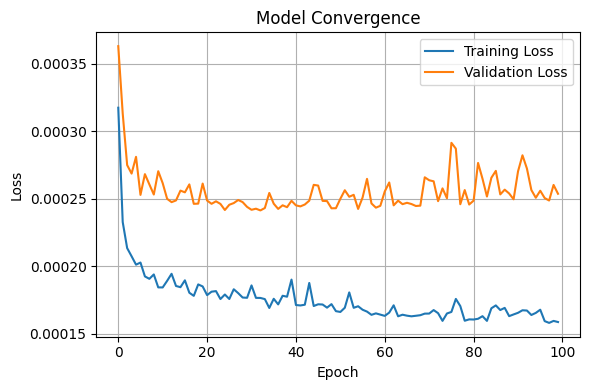

In [388]:
# Plot the convergence curve for training and validation
fig = plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Convergence')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.tight_layout()
plt.grid(True) 
plt.legend()
plt.show()
fig.savefig('CNN_convergence.png')

In [389]:
evaluate_model(DL_model, X_train, y_train, X_test, y_test)

4/4 [==============================] - 0s 3ms/step
      Metric  Training Set  Testing Set
0        MSE      0.000159     0.000254
1        MAE      0.009701     0.012150
2       RMSE      0.012628     0.015927
3  R-squared      0.607837     0.564248


,Metric,Training Set,Testing Set
0,MSE,0.000159,0.000254
1,MAE,0.009701,0.012150
2,RMSE,0.012628,0.015927
3,R-squared,0.607837,0.564248


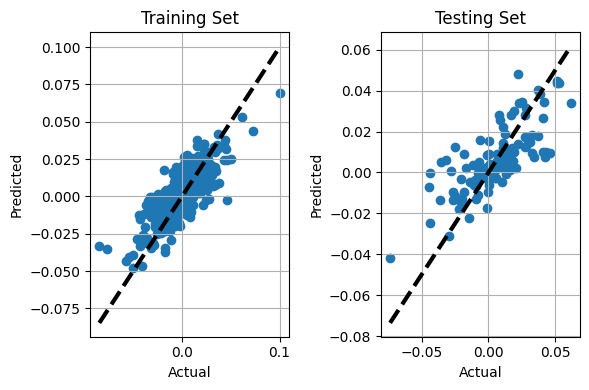

In [390]:
plot_actual_vs_predicted('Correlation_DL', y_train, y_train_pred, y_test, y_test_pred)

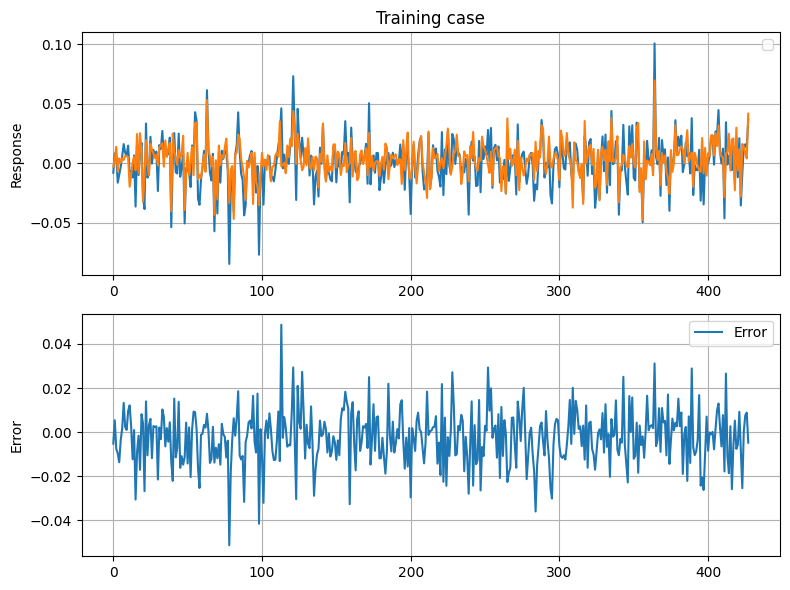

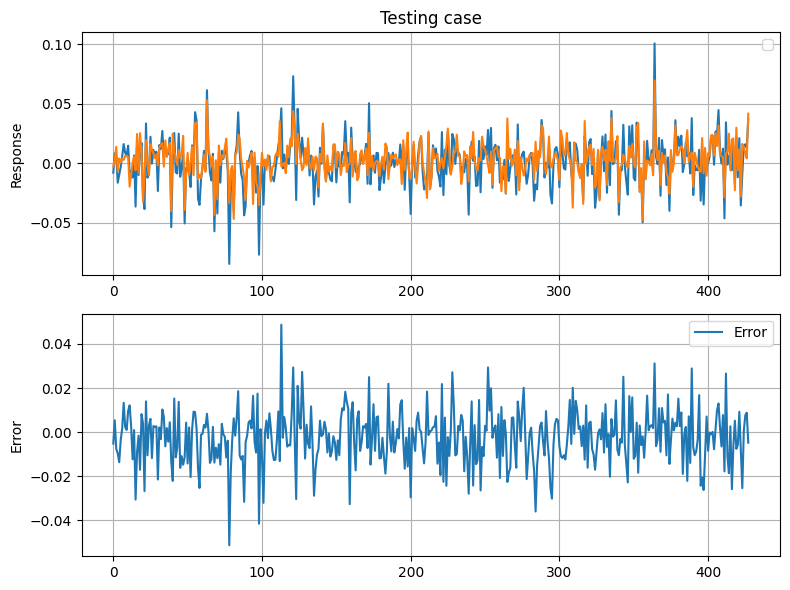

In [391]:
plot_two_responses(y_train, y_train_pred, 'DL_training.png', 'Training case')
plot_two_responses(y_train, y_train_pred, 'DL_testing.png', 'Testing case')

# plot_actual_vs_predicted_response(y_train, y_train_pred, 'Actual_Predicted_DL_Training.png')
# plot_actual_vs_predicted_response(y_test, y_test_pred, 'Actual_Predicted_DL_Testing.png')

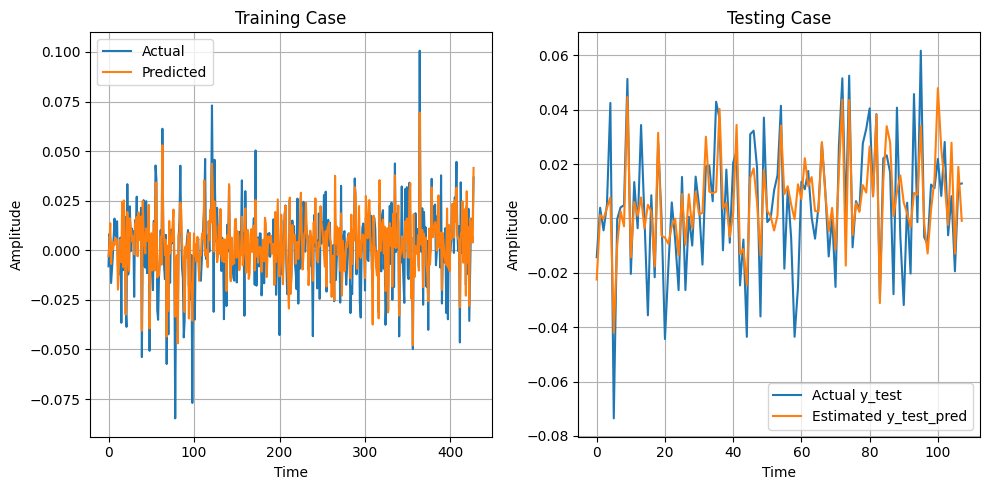

In [392]:
plot_actual_vs_estimated_responses_side_by_side(y_train, y_train_pred, y_test, y_test_pred, 'Actual_Estimated_SS_DL.png')

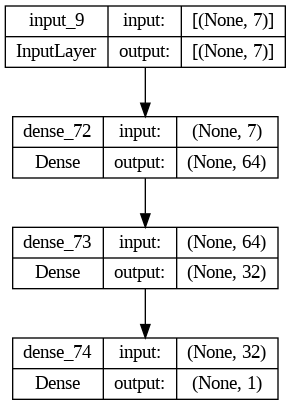

In [393]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_shape = X_train.shape[1]

# Define the model architecture
inputs = Input(shape=(input_shape,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True)

In [394]:
# Save the model
model.save('CNN_model_Turkey_2.h5')

In [395]:
# # Load the saved model
# loaded_model = load_model('CNN_model_Turkey.h5')